<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/shopping_data_missing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df= pd.read_csv('shopping_data_missing.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,NaN,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,NaN
5,6,Female,22.0,NaN,76.0
6,7,Female,35.0,18.0,6.0
7,8,Female,23.0,18.0,94.0
8,9,Male,64.0,19.0,NaN
9,10,Female,30.0,19.0,72.0


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      198 non-null    float64
 4   Spending Score (1-100)  198 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,199.000000,198.000000,198.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.939698,61.005051,50.489899
std,57.879185,NaN,13.946376,26.017857,25.723587
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,29.000000,42.250000,35.000000
50%,100.500000,NaN,36.000000,62.000000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       1
Annual Income (k$)        2
Spending Score (1-100)    2
dtype: int64

In [ ]:
import numpy as np


In [ ]:
df['Age'].mean()

38.93969849246231

In [ ]:
#replace nan value with mean for age
df['Age'].replace(np.nan, df['Age'].mean(), inplace= True )

In [ ]:
#replace nan value with mean value for annual income

df['Annual Income (k$)'].replace(np.nan, df['Annual Income (k$)'].mean(), inplace=True)

In [ ]:
#replace nan value with mean value for spending score

df['Spending Score (1-100)'].replace(np.nan,df['Spending Score (1-100)'].mean(), inplace =True )

In [ ]:
duplicated = df[df.duplicated()]

duplicated

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000000,15.000000,39.000000
1,2,Male,38.939698,15.000000,81.000000
2,3,Female,20.000000,61.005051,6.000000
3,4,Female,23.000000,16.000000,77.000000
4,5,Female,31.000000,17.000000,50.489899
...,...,...,...,...,...
195,196,Female,35.000000,120.000000,79.000000
196,197,Female,45.000000,126.000000,28.000000
197,198,Male,32.000000,126.000000,74.000000
198,199,Male,32.000000,137.000000,18.000000


In [ ]:
Convert_genre= pd.get_dummies(df['Genre'])

In [ ]:
df1= pd.concat([df,Convert_genre], axis =1)

df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19.000000,15.000000,39.000000,0,1
1,2,Male,38.939698,15.000000,81.000000,0,1
2,3,Female,20.000000,61.005051,6.000000,1,0
3,4,Female,23.000000,16.000000,77.000000,1,0
4,5,Female,31.000000,17.000000,50.489899,1,0
...,...,...,...,...,...,...,...
195,196,Female,35.000000,120.000000,79.000000,1,0
196,197,Female,45.000000,126.000000,28.000000,1,0
197,198,Male,32.000000,126.000000,74.000000,0,1
198,199,Male,32.000000,137.000000,18.000000,0,1


In [ ]:
bin= np.linspace(min(df1['Annual Income (k$)']),max(df1['Annual Income (k$)']),4)

group_name= ['Low','Average','High']

df1['Annual_income__binned']= pd.cut(df['Annual Income (k$)'],bin,labels= group_name, include_lowest =True )

In [ ]:
bin1 = np.linspace(min(df1['Spending Score (1-100)']), max(df1['Spending Score (1-100)']),4)

group = ['Low Spend','Normal Spend','High Spend']

df1['Spending_score_binned'] = pd.cut(df['Spending Score (1-100)'], bin1, labels=group, include_lowest = True )

In [ ]:
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Annual_income__binned,Spending_score_binned
0,1,Male,19.000000,15.000000,39.000000,0,1,Low,Normal Spend
1,2,Male,38.939698,15.000000,81.000000,0,1,Low,High Spend
2,3,Female,20.000000,61.005051,6.000000,1,0,Average,Low Spend
3,4,Female,23.000000,16.000000,77.000000,1,0,Low,High Spend
4,5,Female,31.000000,17.000000,50.489899,1,0,Low,Normal Spend
...,...,...,...,...,...,...,...,...,...
195,196,Female,35.000000,120.000000,79.000000,1,0,High,High Spend
196,197,Female,45.000000,126.000000,28.000000,1,0,High,Low Spend
197,198,Male,32.000000,126.000000,74.000000,0,1,High,High Spend
198,199,Male,32.000000,137.000000,18.000000,0,1,High,Low Spend


In [ ]:
#Data visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df1.corr()

<ipython-input-39-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
CustomerID,1.000000,-0.037902,0.963157,-0.004180,-0.057400,0.057400
Age,-0.037902,1.000000,-0.046332,-0.308111,-0.068412,0.068412
Annual Income (k$),0.963157,-0.046332,1.000000,-0.014970,-0.041956,0.041956
Spending Score (1-100),-0.004180,-0.308111,-0.014970,1.000000,0.049958,-0.049958
Female,-0.057400,-0.068412,-0.041956,0.049958,1.000000,-1.000000
Male,0.057400,0.068412,0.041956,-0.049958,-1.000000,1.000000


In [ ]:
#Pearson corrrelation coefficient

import scipy.stats as st
correlation,p_value = st.pearsonr(df['CustomerID'],df['Spending Score (1-100)'])
print('Pearson coef:', correlation)
print('P_value:',p_value)

Pearson coef: -0.004179615066881345
P_value: 0.9531604391969148


In [ ]:
correlation,p_value = st.pearsonr(df['Age'],df['Spending Score (1-100)'])
print('Pearson coef:', correlation)
print('P_value:',p_value)

Pearson coef: -0.30811136698036107
P_value: 9.058767815312905e-06


In [ ]:
correlation,p_value = st.pearsonr(df['Annual Income (k$)'],df['Spending Score (1-100)'])
print('Pearson coef:', correlation)
print('P_value:',p_value)

Pearson coef: -0.014969786527488978
P_value: 0.8333636360568316


In [ ]:
correlation,p_value = st.pearsonr(df1['Female'],df1['Spending Score (1-100)'])
print('Pearson coef:', correlation)
print('P_value:',p_value)

Pearson coef: 0.04995816416825675
P_value: 0.48235150414724837


In [ ]:
correlation,p_value = st.pearsonr(df1['Male'],df1['Spending Score (1-100)'])
print('Pearson coef:', correlation)
print('P_value:',p_value)

Pearson coef: -0.04995816416825673
P_value: 0.48235150414724837


(0.0, 103.9)

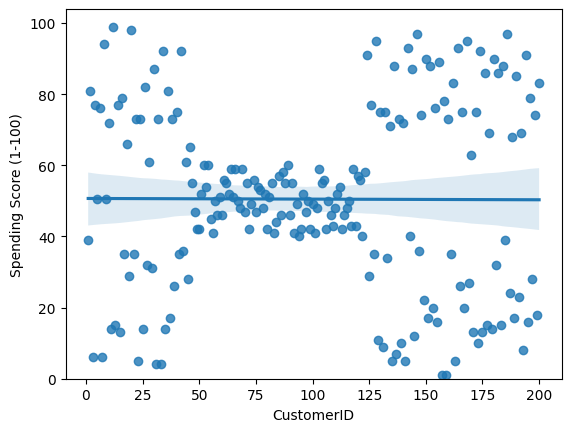

In [ ]:
sns.regplot(x='CustomerID',y= 'Spending Score (1-100)', data=df1)
plt.ylim(0,)

(0.0, 143.1)

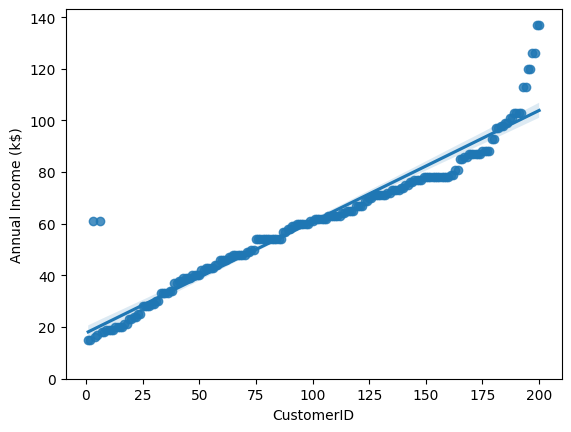

In [ ]:
sns.regplot(x='CustomerID',y= 'Annual Income (k$)', data=df1)
plt.ylim(0,)

(0.0, 103.9)

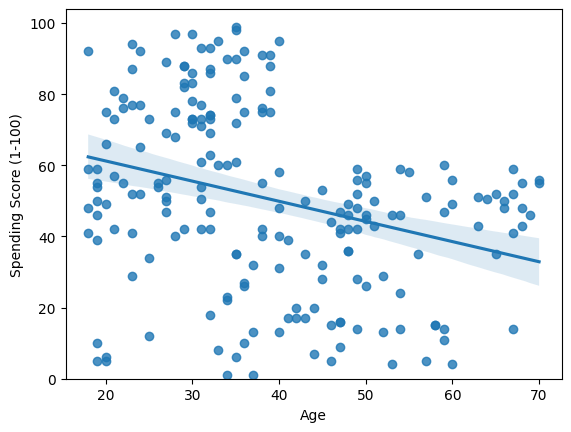

In [ ]:
sns.regplot(x='Age',y= 'Spending Score (1-100)', data=df1)
plt.ylim(0,)

(0.0, 143.1)

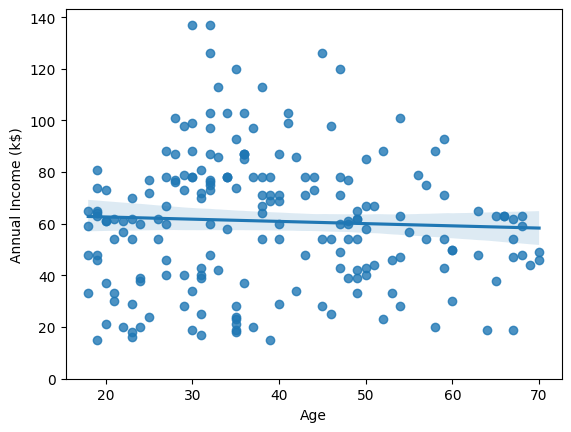

In [ ]:
sns.regplot(x='Age',y= 'Annual Income (k$)', data=df1)
plt.ylim(0,)

(0.0, 103.9)

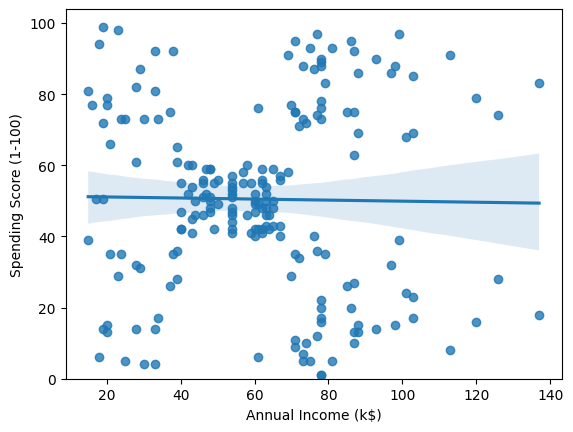

In [ ]:
sns.regplot(x='Annual Income (k$)',y= 'Spending Score (1-100)', data=df1)
plt.ylim(0,)

(0.0, 103.9)

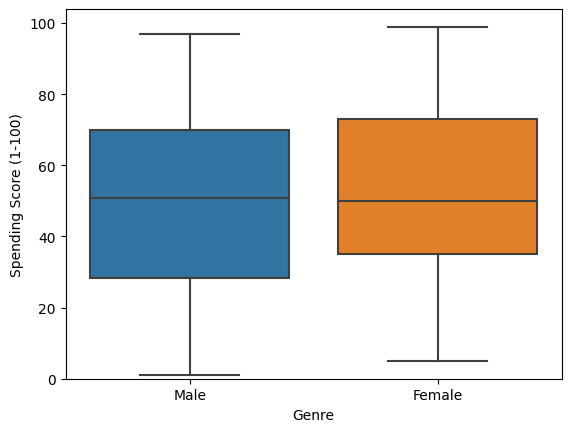

In [ ]:
sns.boxplot(x='Genre', y = 'Spending Score (1-100)', data= df1)
plt.ylim(0,)

(0.0, 143.1)

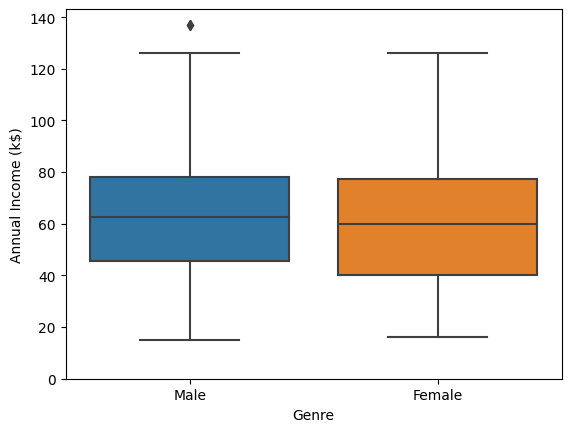

In [ ]:
sns.boxplot(x='Genre', y = 'Annual Income (k$)', data= df1)
plt.ylim(0,)

(0.0, 103.9)

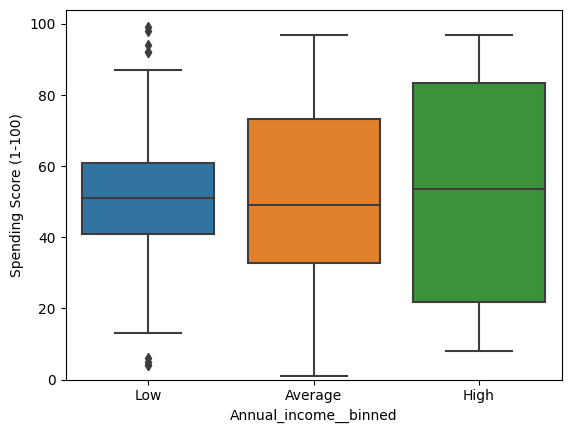

In [ ]:
sns.boxplot(x='Annual_income__binned', y = 'Spending Score (1-100)', data= df1)
plt.ylim(0,)

(0.0, 143.1)

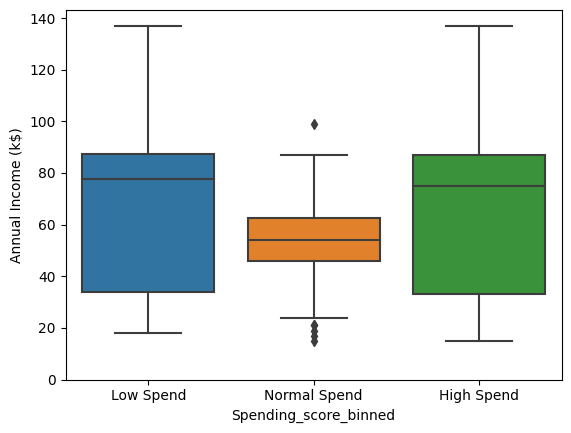

In [ ]:
sns.boxplot(x='Spending_score_binned', y = 'Annual Income (k$)', data= df1)
plt.ylim(0,)

In [ ]:
df1.describe(include= 'all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Annual_income__binned,Spending_score_binned
count,200.000000,200,200.000000,200.000000,200.000000,200.000000,200.000000,200,200
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3
top,NaN,Female,NaN,NaN,NaN,NaN,NaN,Average,Normal Spend
freq,NaN,112,NaN,NaN,NaN,NaN,NaN,96,95
mean,100.500000,NaN,38.939698,61.005051,50.489899,0.560000,0.440000,NaN,NaN
std,57.879185,NaN,13.911290,25.886784,25.593997,0.497633,0.497633,NaN,NaN
min,1.000000,NaN,18.000000,15.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,50.750000,NaN,29.000000,42.750000,35.000000,0.000000,0.000000,NaN,NaN
50%,100.500000,NaN,36.000000,61.502525,50.000000,1.000000,0.000000,NaN,NaN
75%,150.250000,NaN,49.000000,78.000000,73.000000,1.000000,1.000000,NaN,NaN


In [ ]:
#groupby

df2 = df1[['Genre','Annual_income__binned','Spending Score (1-100)']]
df2

,Genre,Annual_income__binned,Spending Score (1-100)
0,Male,Low,39.000000
1,Male,Low,81.000000
2,Female,Average,6.000000
3,Female,Low,77.000000
4,Female,Low,50.489899
...,...,...,...
195,Female,High,79.000000
196,Female,High,28.000000
197,Male,High,74.000000
198,Male,High,18.000000


In [ ]:
df2_grouped =df2.groupby(['Genre','Annual_income__binned'], as_index=False).mean()

df2_grouped

,Genre,Annual_income__binned,Spending Score (1-100)
0,Female,Low,50.614373
1,Female,Average,52.450980
2,Female,High,52.076923
3,Male,Low,51.485831
4,Male,Average,46.666667
5,Male,High,51.857143


In [ ]:
df2_pivoted =df2_grouped.pivot(index='Genre',columns='Annual_income__binned')

df2_pivoted

Spending Score (1-100)                      
Annual_income__binned                    Low    Average       High
Genre                                                             
Female                             50.614373  52.450980  52.076923
Male                               51.485831  46.666667  51.857143

<Axes: xlabel='None-Annual_income__binned', ylabel='Genre'>

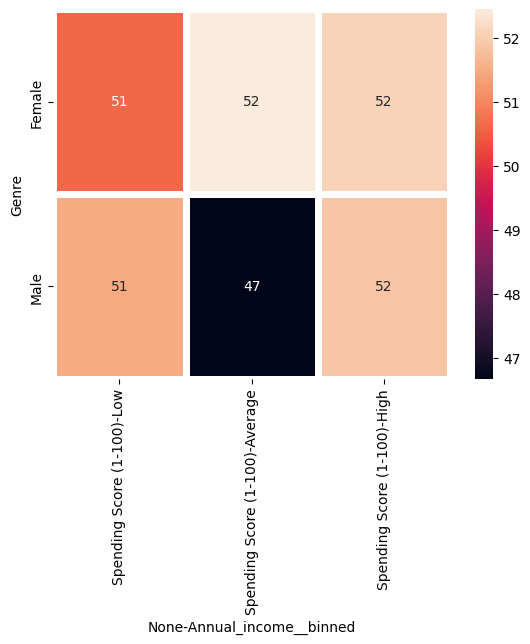

In [ ]:
sns.heatmap(df2_pivoted,linewidths= 5,annot=True)

In [ ]:
df1.corr()

<ipython-input-58-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
CustomerID,1.000000,-0.037902,0.963157,-0.004180,-0.057400,0.057400
Age,-0.037902,1.000000,-0.046332,-0.308111,-0.068412,0.068412
Annual Income (k$),0.963157,-0.046332,1.000000,-0.014970,-0.041956,0.041956
Spending Score (1-100),-0.004180,-0.308111,-0.014970,1.000000,0.049958,-0.049958
Female,-0.057400,-0.068412,-0.041956,0.049958,1.000000,-1.000000
Male,0.057400,0.068412,0.041956,-0.049958,-1.000000,1.000000


<ipython-input-63-05d87155c900>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_corr = df1.corr()


<Axes: >

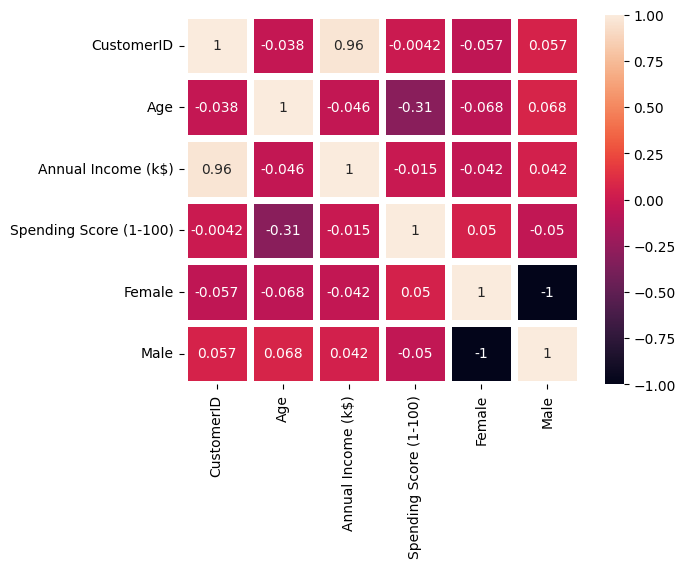

In [ ]:
# visualise heatmap for correlation features

df1_corr = df1.corr()

sns.heatmap(df1_corr, linewidths= 5, annot= True, annot_kws=None)



In [ ]:
#create training and testing sets

msk =np.random.rand(len(df1))<0.8

train = df[msk]
test =df[~msk]


<function matplotlib.pyplot.show(close=None, block=None)>

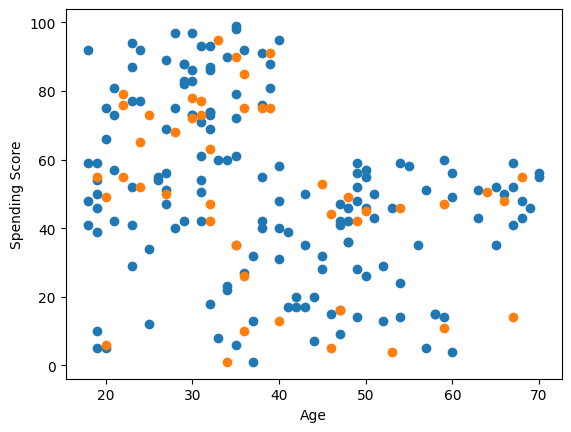

In [ ]:
# visualise the training set with testing set

plt.scatter(train.Age, train['Spending Score (1-100)'])
plt.scatter(test.Age, test['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show

In [ ]:
#Modeling
from sklearn import linear_model
regr= linear_model.LinearRegression()

train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Spending Score (1-100)']])

regr.fit(train_x,train_y)

print('Theta zero', regr.intercept_)
print('Theta one', regr.coef_)

Theta zero [71.76913943]
Theta one [[-0.54575996]]


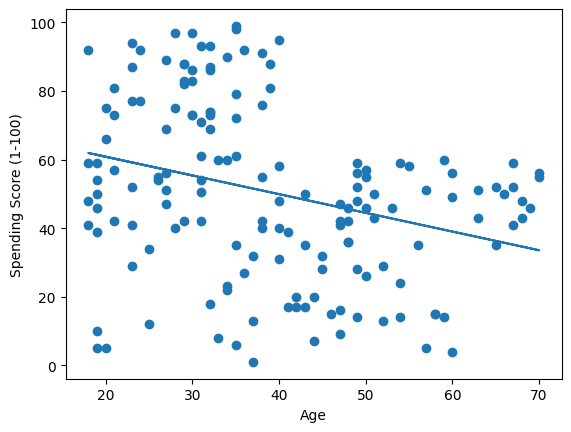

In [ ]:
#visualise the best fitter line of linear regression training set
plt.scatter(train.Age, train['Spending Score (1-100)'])
plt.plot(train_x,regr.intercept_[0]+  regr.coef_[0][0]* train_x)
plt.xlabel('Age') #label the x axis
plt.ylabel('Spending Score (1-100)') #label the y axis
plt.show()

In [ ]:
#Evaluate
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Age']])
test_y = np.asanyarray(test[['Spending Score (1-100)']])

test_y_ = regr.predict(test_x)

print('Mean Absolute Error:', np.mean(np.absolute(test_y_ - test_y)))
print('Mean Square Error:', np.mean(test_y_ - test_y)**2)
print('R2 Score:', r2_score(test_y,test_y_)*100)

Mean Absolute Error: 19.981607848820847
Mean Square Error: 0.014951297005027833
R2 Score: 10.98159009931836
